In [1]:
import gsw
from xmitgcm import open_mdsdataset
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 14, 'axes.labelsize' : 14,
      'legend.fontsize' : 14,'legend.handlelength': 2})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

In [3]:
rhonil = 999.8
rhoconst = 999.8
tref = 20
sref = 35
sbeta = 7.4e-4
talpha = 2e-4


def linear_rho(s, t, sref, tref):
    rho = 1000 * (sbeta * (s - sref) - talpha * (t - tref)) + 1025
    return rho

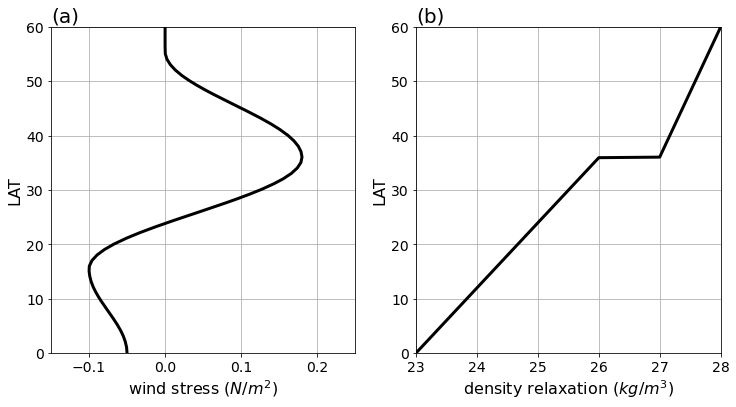

In [18]:
dir = '/data/home/liutongya/data/pv_flux/degree_0.1/den_jump2/taux_real_ex2.bin'
data = np.fromfile(dir, dtype='>f8')
wind1 = np.reshape(data, (600, 600))

dir = '/data/home/liutongya/data/pv_flux/degree_0.1/den_jump2/surtemp_ex2.bin'
data = np.fromfile(dir, dtype='>f8')
sst1 = np.reshape(data, (600, 600))

den1 = linear_rho(35, sst1, sref, tref) - 1000

fig = plt.figure(figsize=(12, 6))

yy2 = np.arange(0.05, 60, 0.1)

ax1 = plt.subplot(121)

ax1.plot(wind1[:, 10], yy2, 'k-', linewidth=3, label='EX1')

plt.grid()
plt.ylim(0, 60)

plt.xlim(-0.15, 0.25)
plt.text(-0.15, 61, '(a)', size=20)
plt.xlabel(r'wind stress ($N/m^2$)', size=16)
plt.ylabel('LAT', size=16)
#plt.title('Wind stress', size=14)

ax2 = plt.subplot(122)

plt.plot(den1[:, 10], yy2, 'k-', linewidth=3)

#plt.title('Density relaxation', size=14)
plt.xlabel(r'density relaxation ($kg/m^3$)', size=16)
plt.ylabel('LAT', size=16)

plt.xlim(23, 28)
plt.ylim(0, 60)
plt.text(23, 61, '(b)', size=20)
plt.grid()
#plt.legend(loc=4)
#plt.savefig('./FIGs/Figure_01.png', dpi=300, bbox_inches='tight')